In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from datetime import datetime
import os
import pickle
import seaborn

In [13]:
industri_perusahaan = dict()
subindustri_perusahaan = dict()
sektor_perusahaan = dict()
subsektor_perusahaan = dict()

with open('../data/relation.csv', 'r') as file:
    reader = csv.reader(file, delimiter='|')
    for row in reader:
        if(row[1] == 'industri'):
            industri_perusahaan[row[0]] = row[2]
        elif(row[1] == 'sub industri'):
            subindustri_perusahaan[row[0]] = row[2]
        elif(row[1] == 'sektor'):
            sektor_perusahaan[row[0]] = row[2]
        elif(row[1] == 'sub sektor'):
            subsektor_perusahaan[row[0]] = row[2]

In [14]:
valid_relation = ['industri', 'sub industri', 'sektor', 'sub sektor']
df = pd.read_csv('../data/relation.csv', sep='|', header=None)
df = df[df[1].isin(valid_relation)]
df = df.drop([3], axis=1)
df

,0,1,2
0,AALI,sektor,barang konsumen primer
1,AALI,sub sektor,makanan & minuman
2,AALI,industri,produk makanan pertanian
3,AALI,sub industri,perkebunan & tanaman pangan
20,ABBA,sektor,barang konsumen non-primer
...,...,...,...
13514,ZONE,sub industri,ritel pakaian & tekstil
13528,ZYRX,sektor,teknologi
13529,ZYRX,sub sektor,perangkat keras & peralatan teknologi
13530,ZYRX,industri,perangkat komputer


In [15]:
def enlarge_bar():
    fig = plt.figure(1, [30, 20])
    ax = fig.add_subplot(111)

    plt.xticks(fontsize=22, rotation=20)
    plt.yticks(fontsize=22)

Banyak sektor: 11


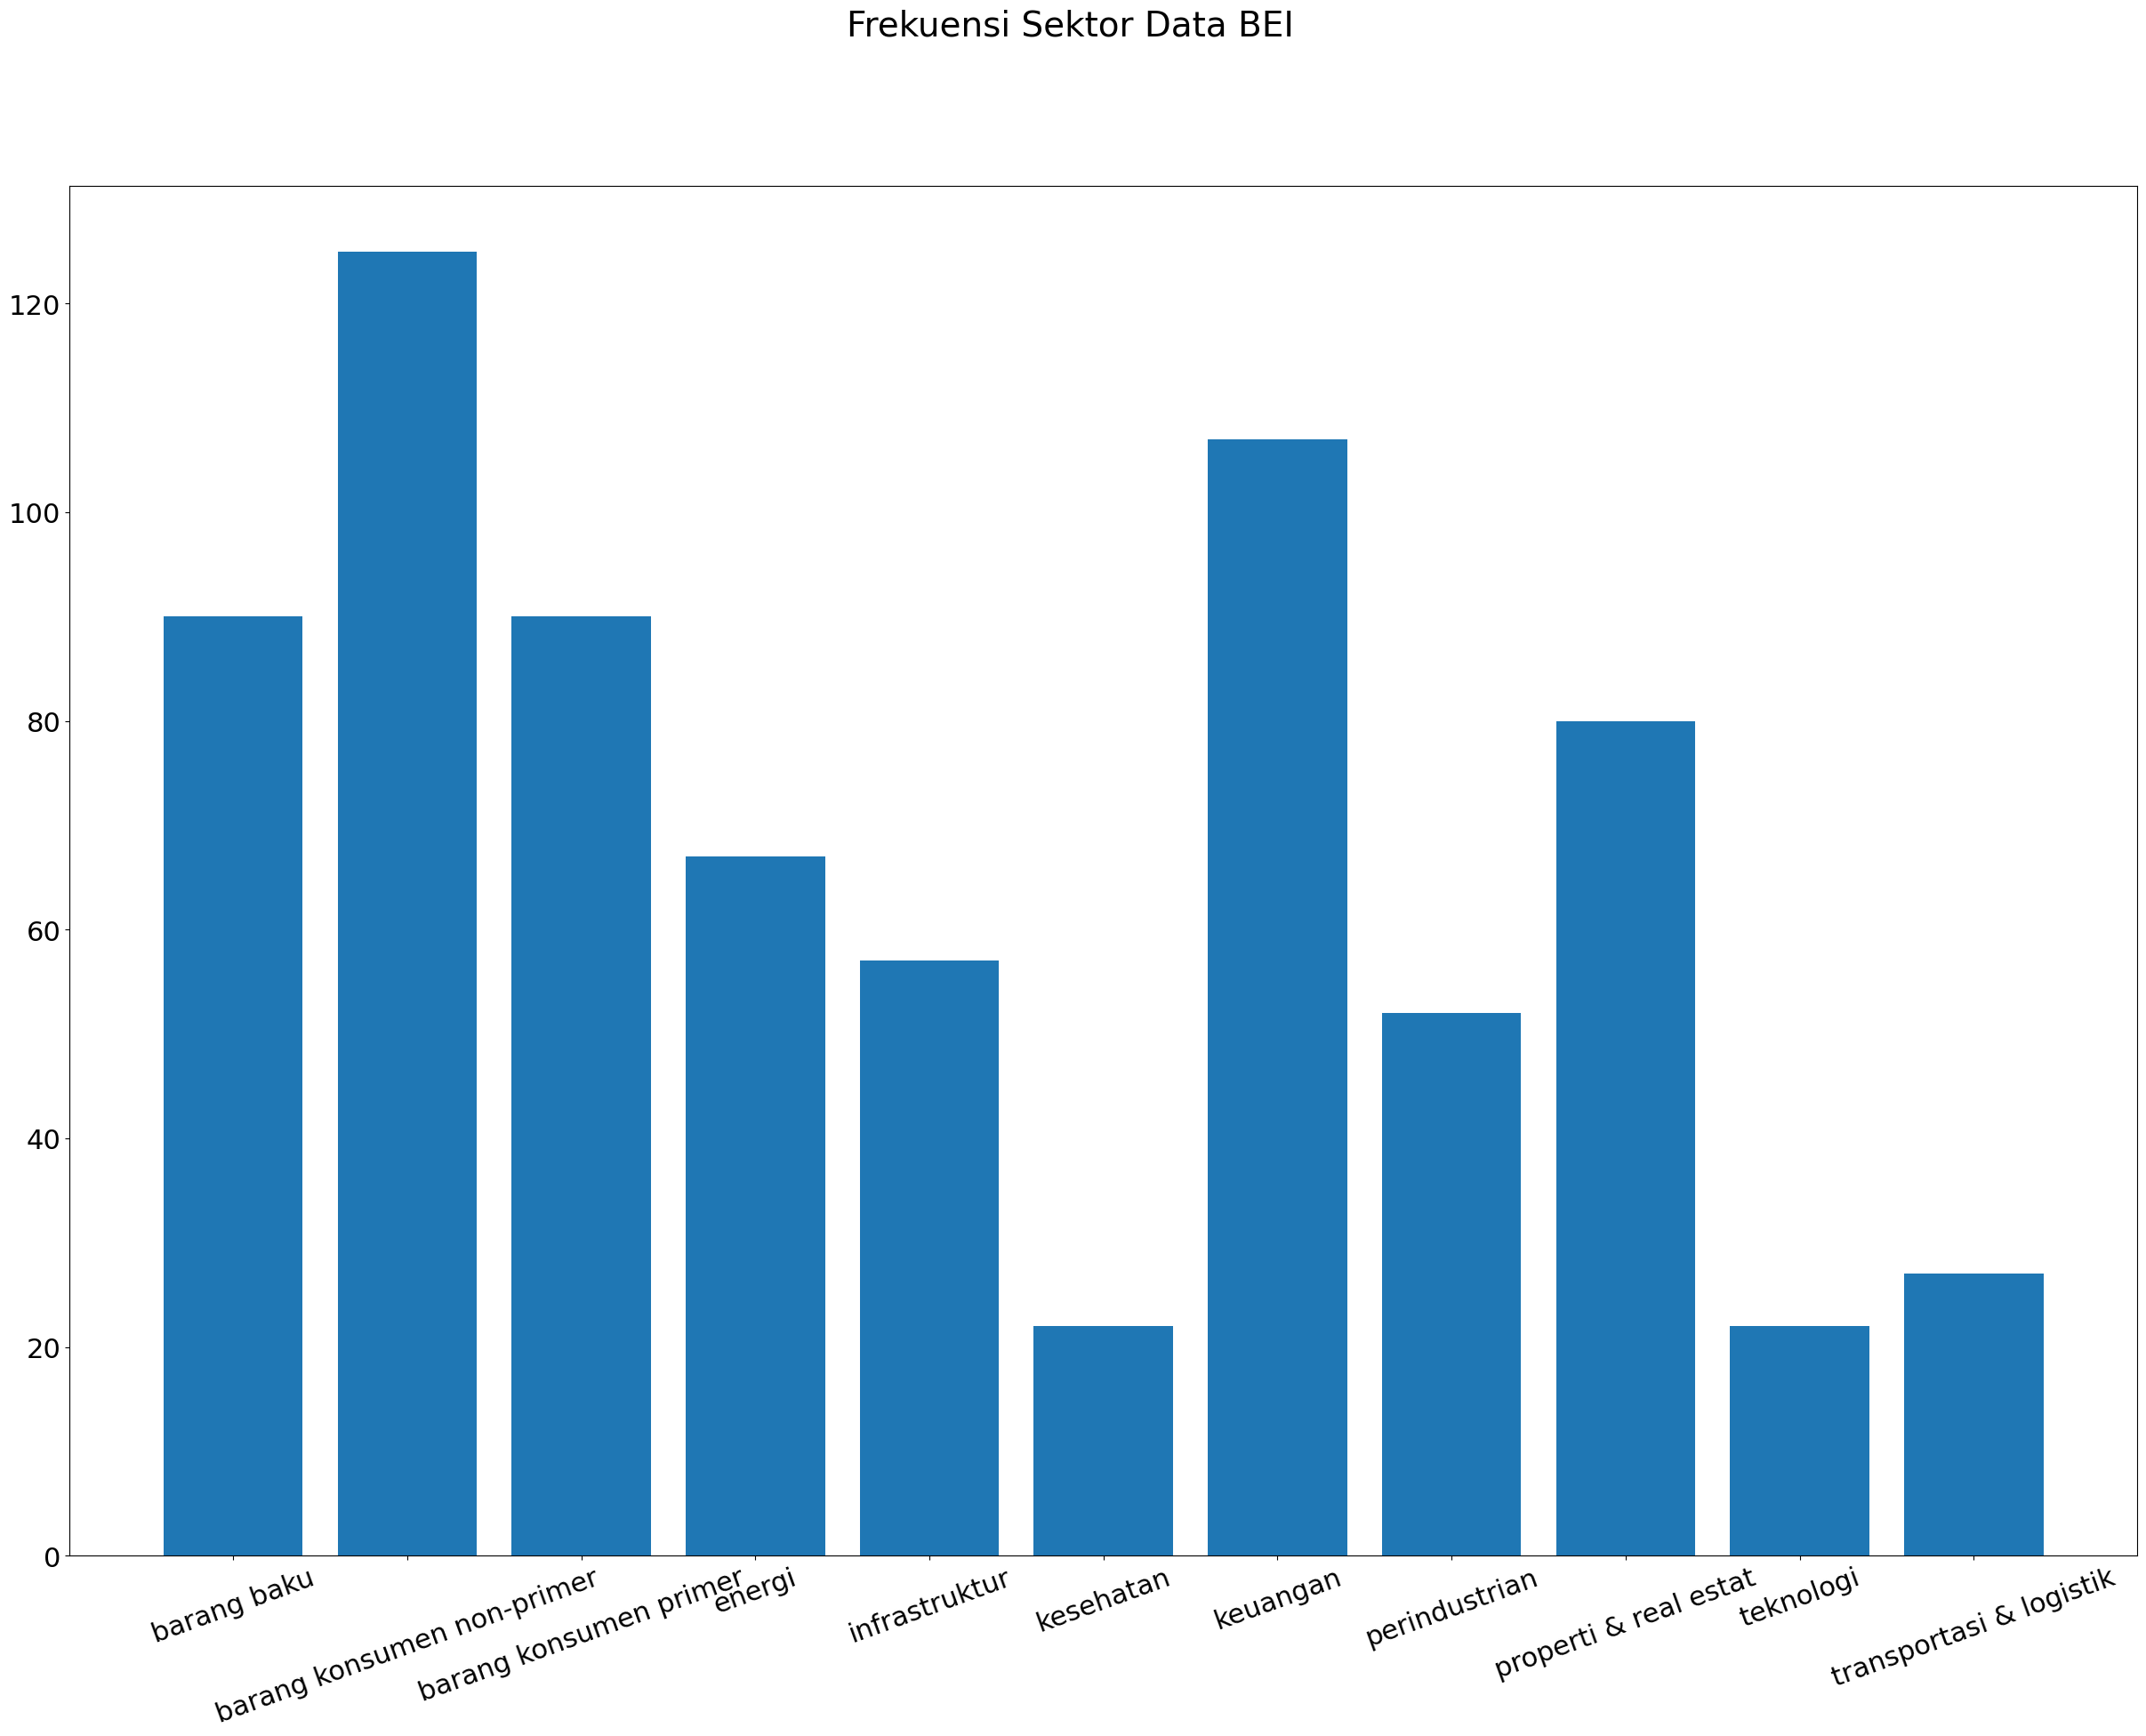

In [16]:
temp_df = df[df[1] == 'sektor'].apply(pd.value_counts).dropna(subset=[2])[[2]]
enlarge_bar()
print("Banyak sektor:", len(temp_df))
plt.bar(temp_df.index, temp_df[2])
plt.suptitle('Frekuensi Sektor Data BEI', fontsize=28)
plt.savefig('../img/sektor_distribution.png', bbox_inches='tight')
plt.show()

Banyak subsektor: 33


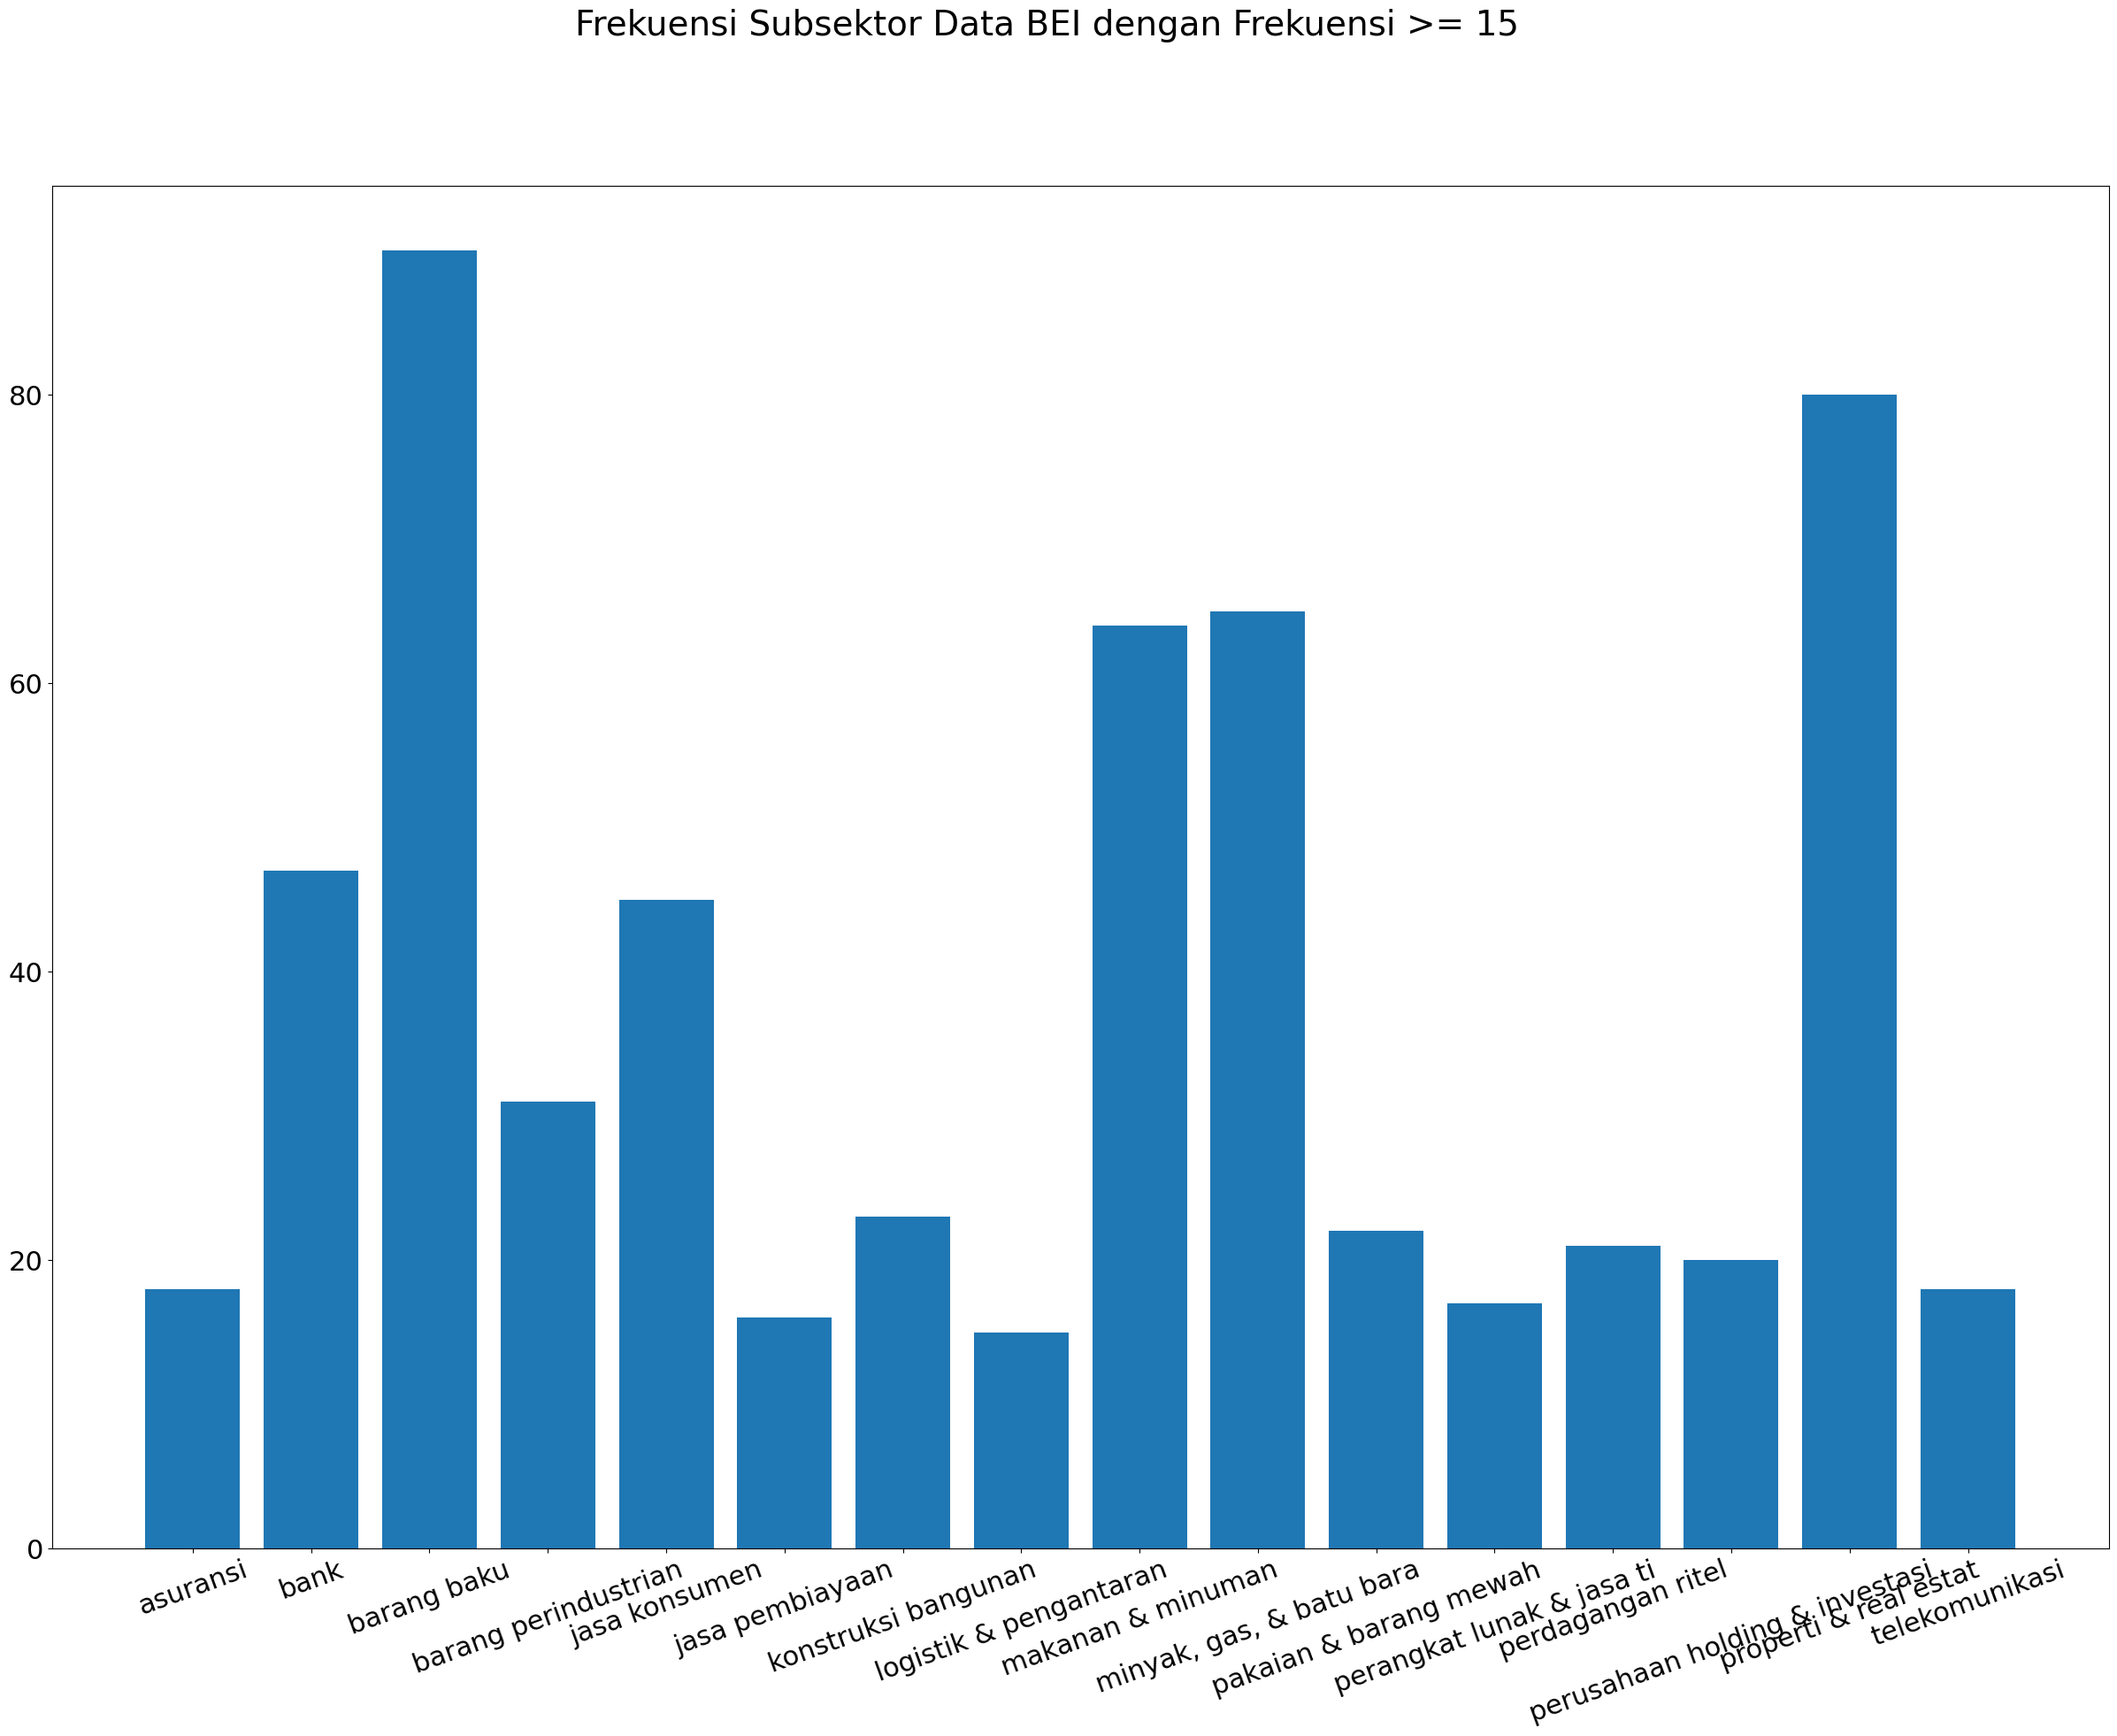

In [17]:
temp_df = df[df[1] == 'sub sektor'].apply(pd.value_counts).dropna(subset=[2])[[2]]
enlarge_bar()
print("Banyak subsektor:", len(temp_df))
temp_df = temp_df[temp_df[2] >= 15]
plt.bar(temp_df.index, temp_df[2])
plt.suptitle('Frekuensi Subsektor Data BEI dengan Frekuensi >= 15', fontsize=28)
plt.savefig('../img/subsektor_distribution.png', bbox_inches='tight')
plt.show()

Banyak industri: 58


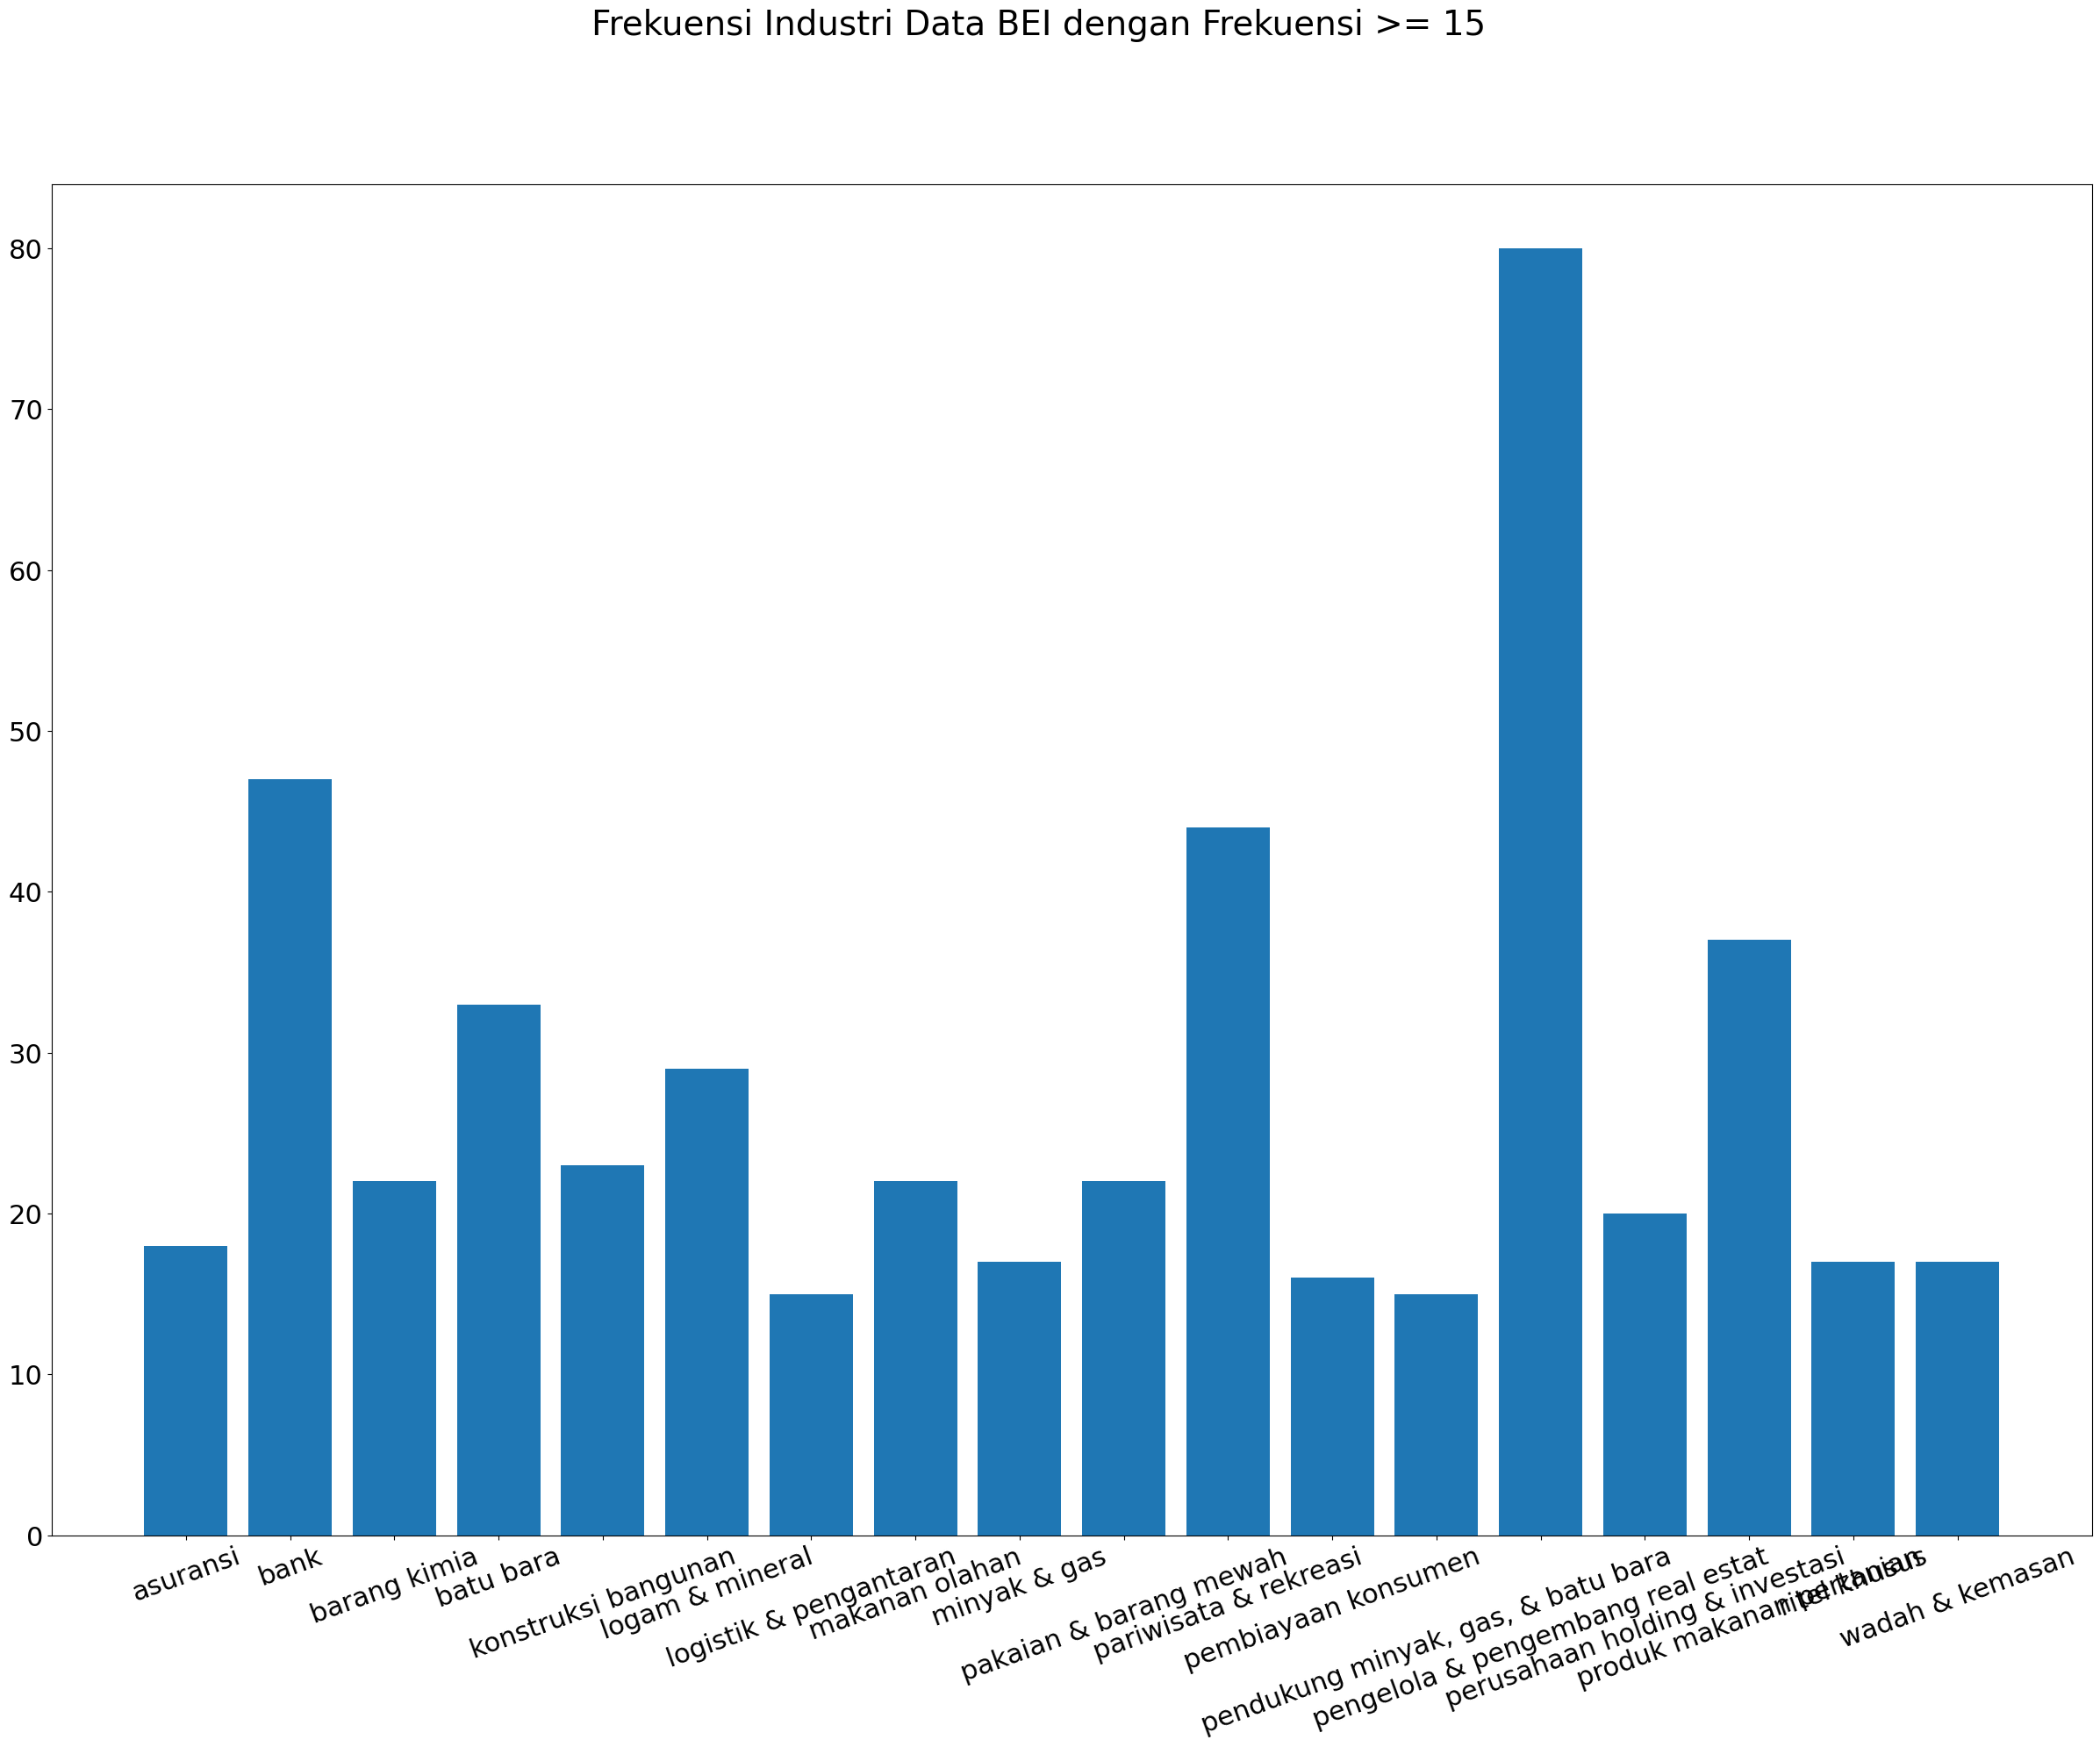

In [18]:
temp_df = df[df[1] == 'industri'].apply(pd.value_counts).dropna(subset=[2])[[2]]
enlarge_bar()
print("Banyak industri:", len(temp_df))
temp_df = temp_df[temp_df[2] >= 15]
plt.bar(temp_df.index, temp_df[2])
plt.suptitle('Frekuensi Industri Data BEI dengan Frekuensi >= 15', fontsize=28)
plt.savefig('../img/industri_distribution.png', bbox_inches='tight')
plt.show()

Banyak subindustri: 100


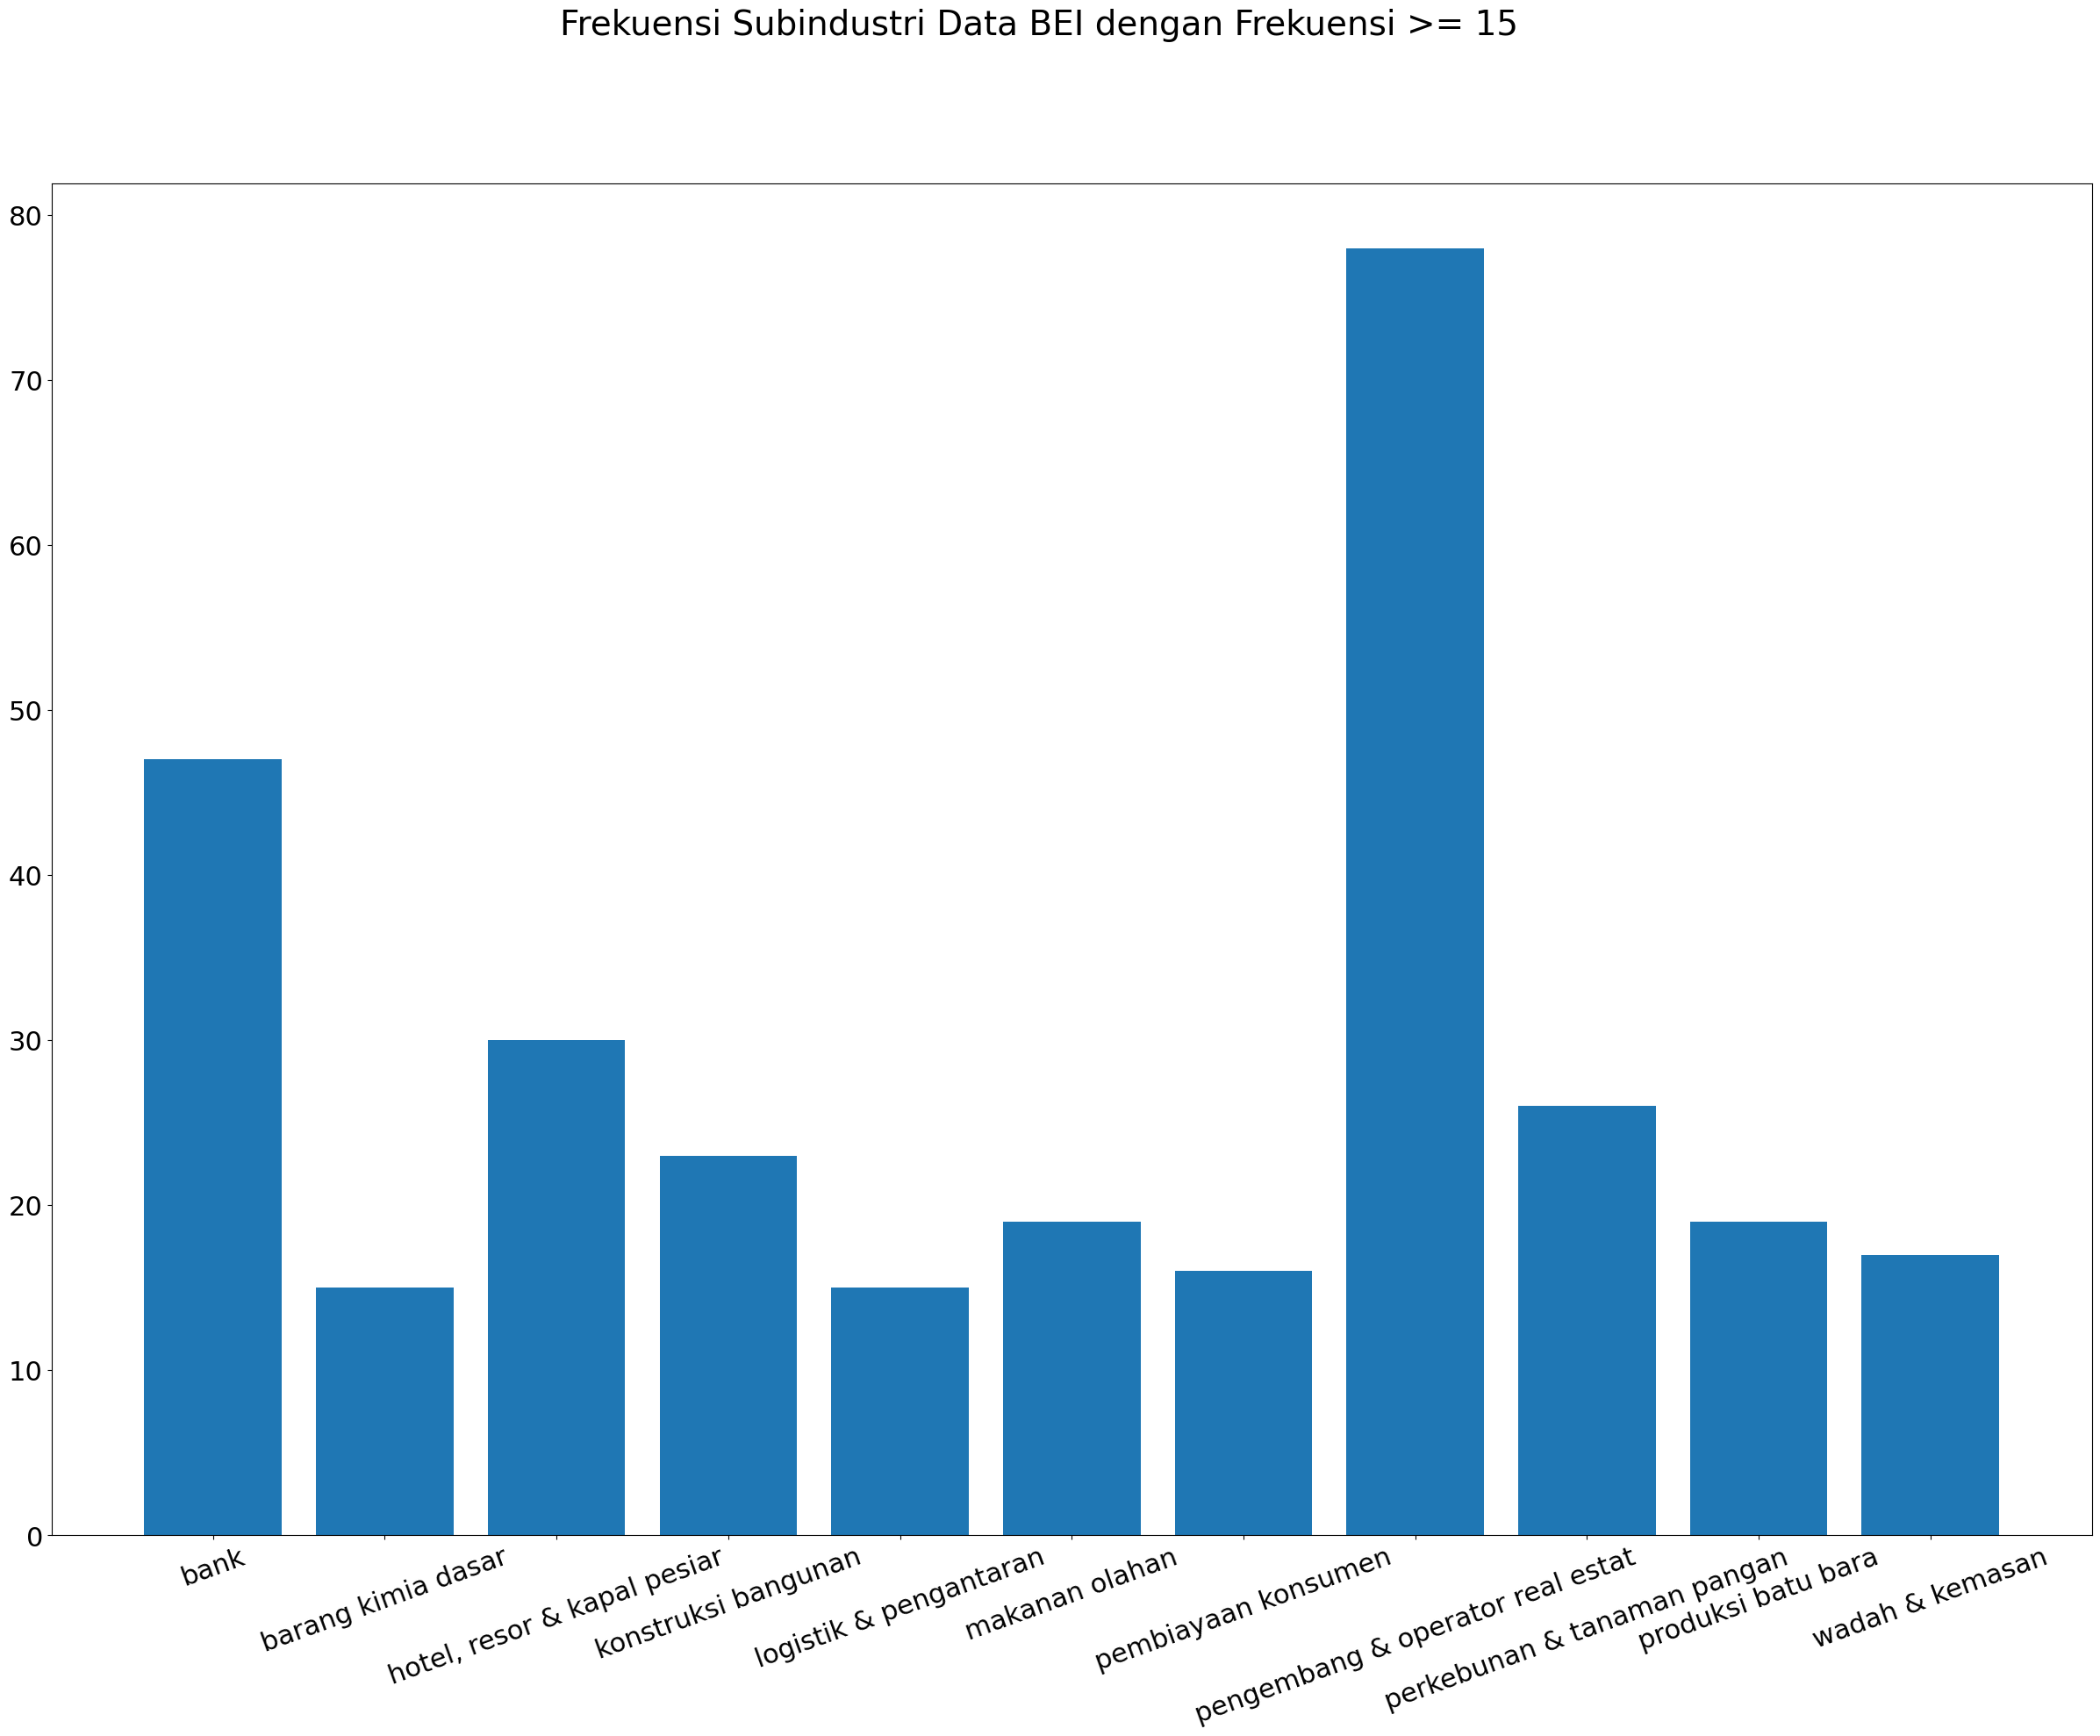

In [19]:
temp_df = df[df[1] == 'sub industri'].apply(pd.value_counts).dropna(subset=[2])[[2]]
enlarge_bar()
print("Banyak subindustri:", len(temp_df))
temp_df = temp_df[temp_df[2] >= 15]
plt.bar(temp_df.index, temp_df[2])
plt.suptitle('Frekuensi Subindustri Data BEI dengan Frekuensi >= 15', fontsize=28)
plt.savefig('../img/subindustri_distribution.png', bbox_inches='tight')
plt.show()

In [20]:
sektor_df = df[df[1] == 'sektor'].reset_index(drop=True).drop([1], axis=1)
subsektor_df = df[df[1] == 'sub sektor'].reset_index(drop=True).drop([1], axis=1)
industri_df = df[df[1] == 'industri'].reset_index(drop=True).drop([1], axis=1)
subindustri_df = df[df[1] == 'sub industri'].reset_index(drop=True).drop([1], axis=1)

combined_df = pd.concat(
    [sektor_df[0], sektor_df[2], subsektor_df[2], industri_df[2], subindustri_df[2]],
    axis=1
)
column_names = combined_df.columns.values
column_names = ['perusahaan', 'sektor', 'sub-sektor', 'industri', 'sub-industri']
combined_df.columns = column_names
combined_df

,perusahaan,sektor,sub-sektor,industri,sub-industri
0,AALI,barang konsumen primer,makanan & minuman,produk makanan pertanian,perkebunan & tanaman pangan
1,ABBA,barang konsumen non-primer,media & hiburan,media,penerbitan
2,ABDA,keuangan,asuransi,asuransi,asuransi umum
3,ABMM,perindustrian,perusahaan holding multi sektor,perusahaan holding multi-sektor,perusahaan holding multi-sektor
4,ACES,barang konsumen non-primer,perdagangan ritel,ritel khusus,ritel barang rumah tangga
...,...,...,...,...,...
734,YULE,keuangan,jasa investasi,jasa investasi,bank investasi & perantara perdagangan
735,ZBRA,infrastruktur,utilitas,utilitas gas,utilitas gas
736,ZINC,barang baku,barang baku,logam & mineral,logam & mineral lainnya
737,ZONE,barang konsumen non-primer,perdagangan ritel,ritel khusus,ritel pakaian & tekstil


In [21]:
def duplicate_checker(attributes):
    temp_df = combined_df.groupby(by=attributes).groups
    temp_set = set()
    is_duplicate = False
    for (k, v) in temp_df.items():
        if k[0] in temp_set:
            print(k[0], "is duplicate in", attributes)
            is_duplicate = True
        else:
            temp_set.add(k[0])
    if not is_duplicate:
        print("There is no duplicate for", attributes)

In [22]:
duplicate_checker(['sub-sektor', 'sektor'])
duplicate_checker(['industri', 'sub-sektor'])
duplicate_checker(['sub-industri', 'industri'])

There is no duplicate for ['sub-sektor', 'sektor']
There is no duplicate for ['industri', 'sub-sektor']
There is no duplicate for ['sub-industri', 'industri']
